## Using Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv("Advertising Budget and Sales.csv")
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Only using 'TV Ad Budget ($)'
x = np.array(df['TV Ad Budget ($)'])
y = np.array(df['Sales ($)'])
print(x[0:10])
print(y[0:10])

[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8]
[22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6]


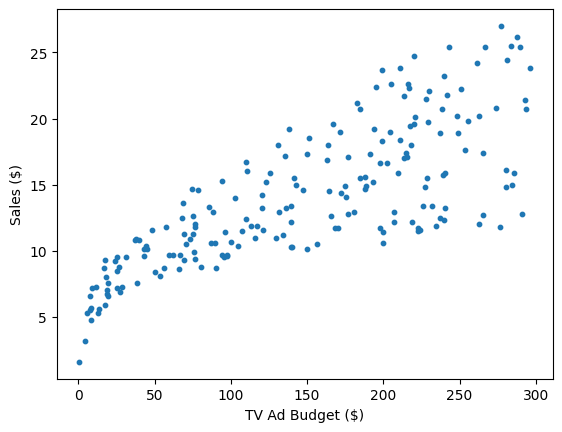

In [4]:
plt.scatter(x, y, s=10)
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.show()

In [5]:
# Normalize the data
x_norm_grad = (x - x.mean()) / x.std()

In [6]:
# Function to compute gradient
def compute_gradient(x, y, w, b):
    df_dw = np.sum(((w * x + b) - y) * x) / len(x)
    df_db = np.sum((w * x + b) - y) / len(x)
    return df_dw, df_db

# Function to compute cost (Mean Squared Error)
def compute_cost(x, y, w, b):
    m = len(x)
    cost = np.sum((w * x + b - y) ** 2) / (2 * m)
    return cost

# Gradient Descent function
def gradient_descent(x, y, lr, iterations):
    w = 0
    b = 0
    cost_history = []  # To store the cost at each iteration
    w_history = []
    for i in range(iterations):
        df_dw, df_db = compute_gradient(x, y, w, b)
        w = w - lr * df_dw  # Subtract the gradient for w
        b = b - lr * df_db  # Subtract the gradient for b

        # Compute the cost at each iteration and store it
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)
        w_history.append(w)

        # Print the cost every 5 iterations (optional)
        if i % 100 == 0:
            print(f"Iteration {i+1}: Cost = {cost}, w = {w}, b = {b}")
        
    return w, b, cost_history, w_history

# Run gradient descent
learning_rate = 0.01
iterations = 1000
w, b, cost_history, w_history = gradient_descent(x_norm_grad, y, learning_rate, iterations)

print("Final weight (w):", w)
print("Final bias (b):", b)

Iteration 1: Cost = 109.73674920901078, w = 0.040710061206467446, b = 0.14022500000000002
Iteration 101: Cost = 19.254579527054183, w = 2.595787417985548, b = 8.941138379551182
Iteration 201: Cost = 7.131807852622728, w = 3.5310283650216108, b = 12.162557309211182
Iteration 301: Cost = 5.507602845305082, w = 3.8733567985198123, b = 13.341700822256538
Iteration 401: Cost = 5.28999238652199, w = 3.9986600765175564, b = 13.77330548303367
Iteration 501: Cost = 5.260837008008539, w = 4.04452512873228, b = 13.931286747522366
Iteration 601: Cost = 5.2569307798749465, w = 4.061313221177057, b = 13.989112999640467
Iteration 701: Cost = 5.256407424699687, w = 4.0674582059601265, b = 14.01027927809031
Iteration 801: Cost = 5.256337305743471, w = 4.069707469127362, b = 14.01802682054734
Iteration 901: Cost = 5.2563279112285155, w = 4.070530772190608, b = 14.020862671652006
Final weight (w): 4.070830370234296
Final bias (b): 14.021894631183178


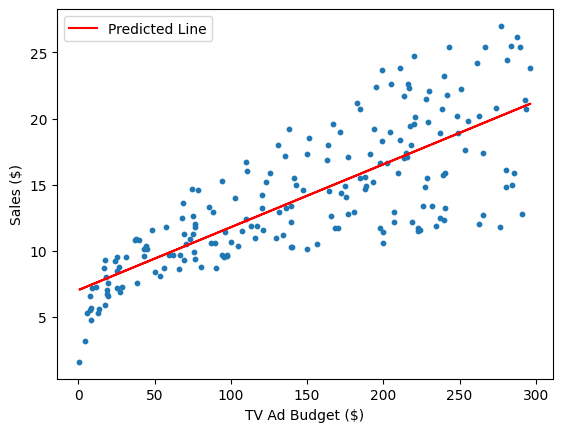

In [7]:
y_pred = w*x_norm_grad + b

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, c='r', label='Predicted Line')
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()

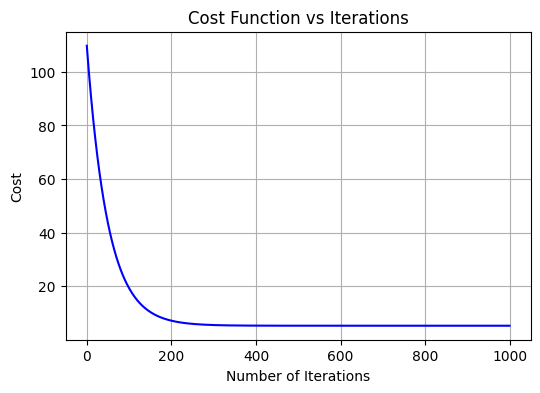

In [8]:
# Plotting cost against the number of iterations
plt.figure(figsize=(6, 4))
plt.plot(range(iterations), cost_history, 'b')  # 'b' for blue line
plt.title('Cost Function vs Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

## Using scikit learn in-built function

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
sgdr = SGDRegressor()
scale = StandardScaler()

In [10]:
x_norm =scale.fit_transform(x.reshape(-1, 1)) 
sgdr.fit(x_norm.reshape(-1, 1), y, )

print("Final weight (w):", sgdr.coef_)
print("Final bias (b):", sgdr.intercept_)

Final weight (w): [4.06876585]
Final bias (b): [14.00473206]


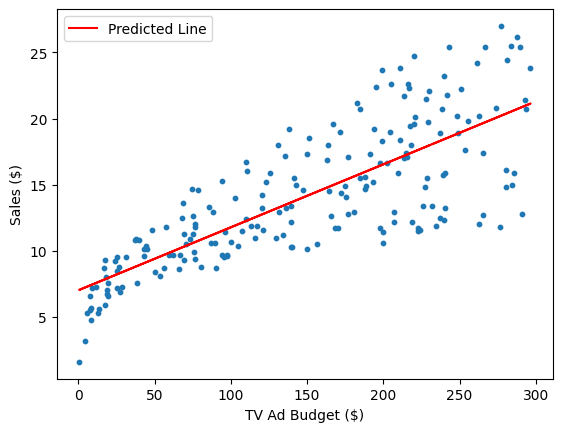

In [182]:
y_pred2 = sgdr.coef_*x_norm + sgdr.intercept_

plt.scatter(x, y, s=10)
plt.plot(x, y_pred2, c='r', label='Predicted Line')
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()

In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.reshape(-1, 1))  # Reshape if x is a 1D array

# Now use x_scaled for training
sgdr = SGDRegressor(max_iter=2000, tol=1e-3)
sgdr.fit(x_scaled, y)

print("Intercept:", sgdr.intercept_)
print("Coefficient:", sgdr.coef_)


Intercept: [14.01240061]
Coefficient: [4.0704567]


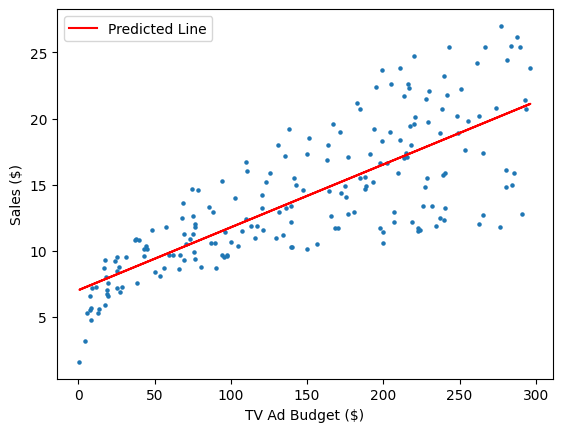

In [15]:
y_pred_sk = sgdr.coef_ * x_scaled + sgdr.intercept_

plt.scatter(x, y, s=5)
plt.plot(x, y_pred_sk, c='r', label='Predicted Line')
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()

## With Many features

In [16]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [20]:
df = df.drop(columns='Unnamed: 0')
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [24]:
X_features = df.columns.values[:-1]
X_features

array(['TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)'], dtype=object)

In [50]:
X_train = np.array(df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']])
Y_train = np.array(df['Sales ($)'])

print(X_train.shape)
print(Y_train.shape)

(200, 3)
(200,)


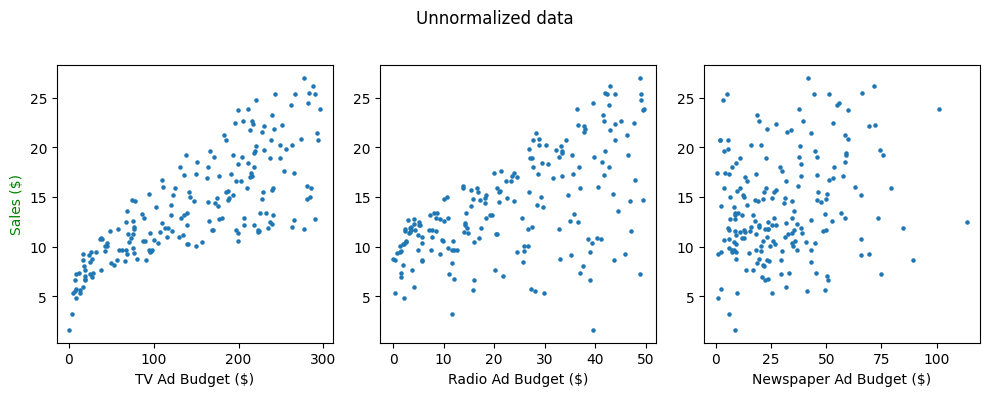

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs = axs.flatten()

for i in range(len(axs)):
    axs[i].scatter(X_train[:, i], Y_train, s = 5)
    axs[i].set_xlabel(X_features[i])
axs[0].set_ylabel('Sales ($)', c='g')
# Set a suptitle for the entire figure
fig.suptitle("Unnormalized data")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.show()

In [62]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)  # returns array

print(X_norm.shape)

(200, 3)


In [63]:
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[295.7  49.6 113.7]
Peak to Peak range by column in Normalized X:[3.45285272 3.34916859 5.2338172 ]


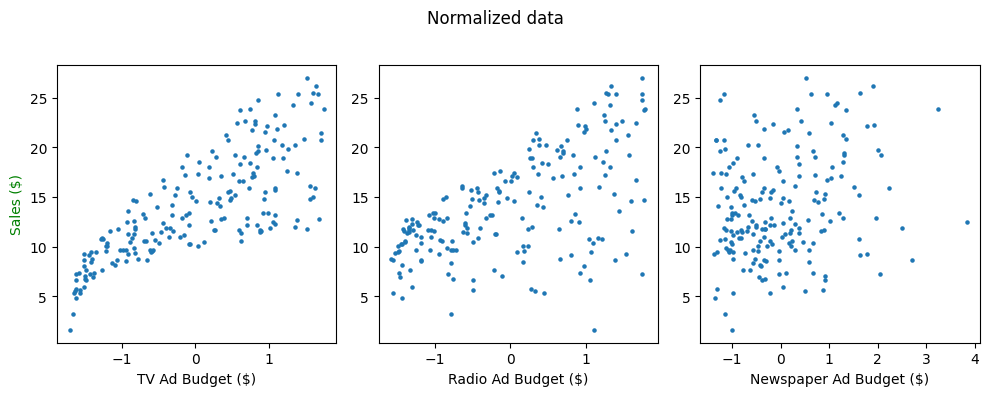

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs = axs.flatten()

for i in range(len(axs)):
    axs[i].scatter(X_norm[:, i], Y_train, s = 5)
    axs[i].set_xlabel(X_features[i])
axs[0].set_ylabel('Sales ($)', c='g')
plt.suptitle("Normalized data")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [118]:
sgdr = SGDRegressor(max_iter=1500, tol=1e-3)
sgdr.fit(X_norm, Y_train)

print(f'Number of iterations : {sgdr.n_iter_}')
print(f'Number of weight w updates : {sgdr.t_}')

Number of iterations : 22
Number of weight w updates : 4401.0


In [119]:
w_list = sgdr.coef_
_b = sgdr.intercept_
print(f"w = {w_list}, b = {_b}")

w = [ 3.91500507  2.7808007  -0.01284548], b = [14.00941474]


In [120]:
# make prediction using sgdr.predict()

sgdr_predict_y = sgdr.predict(X_norm)
sgdr_predict_y.shape

(200,)

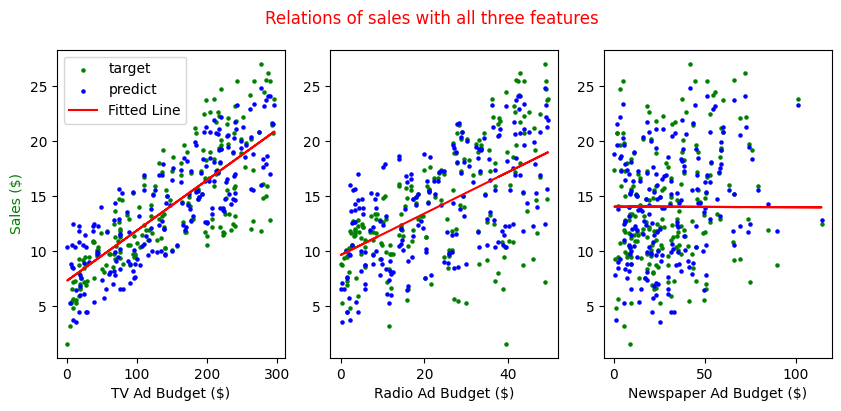

In [125]:
# Plotting the predictions
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs = axs.flatten()

for i in range(len(axs)):
    axs[i].scatter(X_train[:, i], Y_train, s = 5, c='g', label='target')
    axs[i].scatter(X_train[:, i], sgdr_predict_y, s = 5, c='b', label='predict')

    axs[i].plot(X_train[:, i], w_list[i] * X_norm[:, i] + b, label='Fitted Line', c='r')
    
        
    axs[i].set_xlabel(X_features[i])
axs[0].set_ylabel('Sales ($)', c='g')
axs[0].legend();
plt.suptitle('Relations of sales with all three features', c='r')
plt.show()

In [139]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


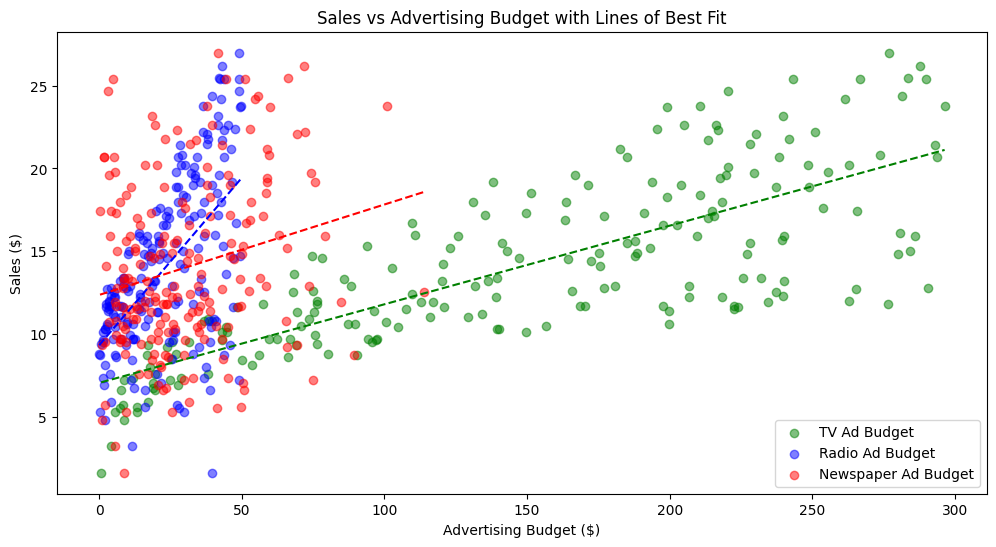

In [151]:
# Create a figure and axis
plt.figure(figsize=(12, 6))

# Function to plot each feature with line of best fit
def plot_with_fit(X, Y, color, label):
    plt.scatter(X, Y, color=color, label=label, alpha=0.5)
    
    # Fit line
    coefficients = np.polyfit(X, Y, 1)  # Linear fit
    poly_eq = np.poly1d(coefficients)  # Polynomial equation
    x_fit = np.linspace(min(X), max(X), 100)  # Points for the fit line
    y_fit = poly_eq(x_fit)  # Evaluate the fit line
    
    plt.plot(x_fit, y_fit, color=color, linestyle='--')  # Draw the fit line

# Plot each feature against sales with line of best fit
plot_with_fit(df['TV Ad Budget ($)'], df['Sales ($)'], color='green', label='TV Ad Budget')
plot_with_fit(df['Radio Ad Budget ($)'], df['Sales ($)'], color='blue', label='Radio Ad Budget')
plot_with_fit(df['Newspaper Ad Budget ($)'], df['Sales ($)'], color='red', label='Newspaper Ad Budget')

# Add labels and title
plt.xlabel('Advertising Budget ($)')
plt.ylabel('Sales ($)')
plt.title('Sales vs Advertising Budget with Lines of Best Fit')
plt.legend()  # Add legend to distinguish between features

# Show the plot
plt.show()


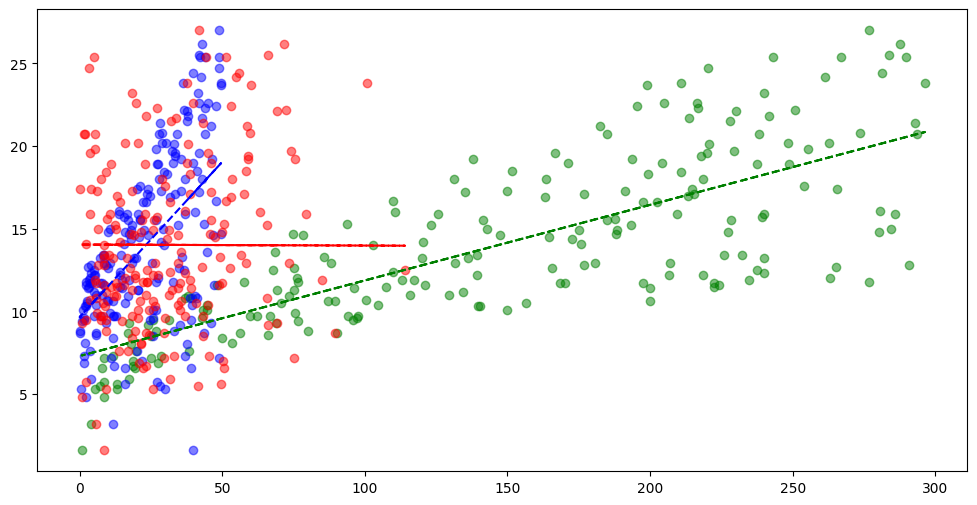

In [155]:
plt.figure(figsize=(12, 6))

# Function to plot each feature with line of best fit
def plot_with_fit(i, X, Y, color, label):
    plt.scatter(X, Y, color=color, label=label, alpha=0.5)
    plt.plot(X, w_list[i] * X_norm[:, i] + b, color=color, linestyle='--')
    
# Plot each feature against sales with line of best fit
plot_with_fit(0, df['TV Ad Budget ($)'], df['Sales ($)'], color='green', label='TV Ad Budget')
plot_with_fit(1, df['Radio Ad Budget ($)'], df['Sales ($)'], color='blue', label='Radio Ad Budget')
plot_with_fit(2, df['Newspaper Ad Budget ($)'], df['Sales ($)'], color='red', label='Newspaper Ad Budget')